
Testing Data:


Accuracy Score =  0.5814360770577933

Precision Score =  0.5322684306536088

Recall Score =  0.5743196517667339

f1 Score =  0.5230816155428002

Confusion Matrix:

 [[240   5   5  49]
 [ 22 198  47  49]
 [ 84  24  12 147]
 [ 41   3   2 214]]

Classification Report:

               precision    recall  f1-score   support

           1       0.62      0.80      0.70       299
           2       0.86      0.63      0.73       316
           3       0.18      0.04      0.07       267
           4       0.47      0.82      0.60       260

    accuracy                           0.58      1142
   macro avg       0.53      0.57      0.52      1142
weighted avg       0.55      0.58      0.54      1142


Training Data:


Accuracy Score =  0.5712721699146047

Precision Score =  0.526537782733435

Recall Score =  0.5662405588995474

f1 Score =  0.5171390275835439

Confusion Matrix:

 [[933  28  20 177]
 [122 754 222 180]
 [356  93  55 567]
 [168   3  22 867]]

Classification Repor

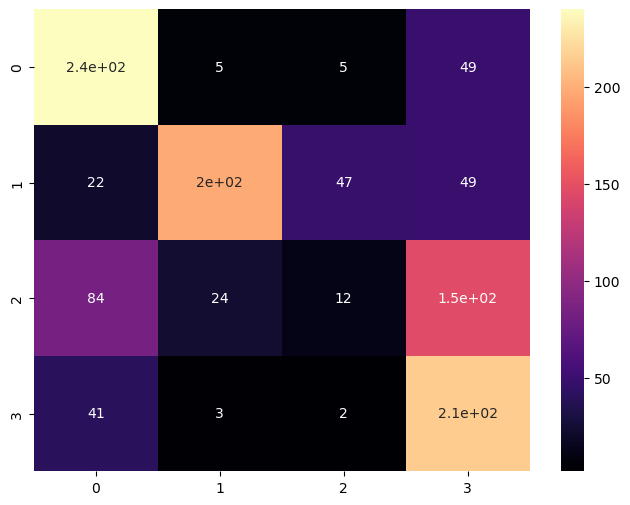

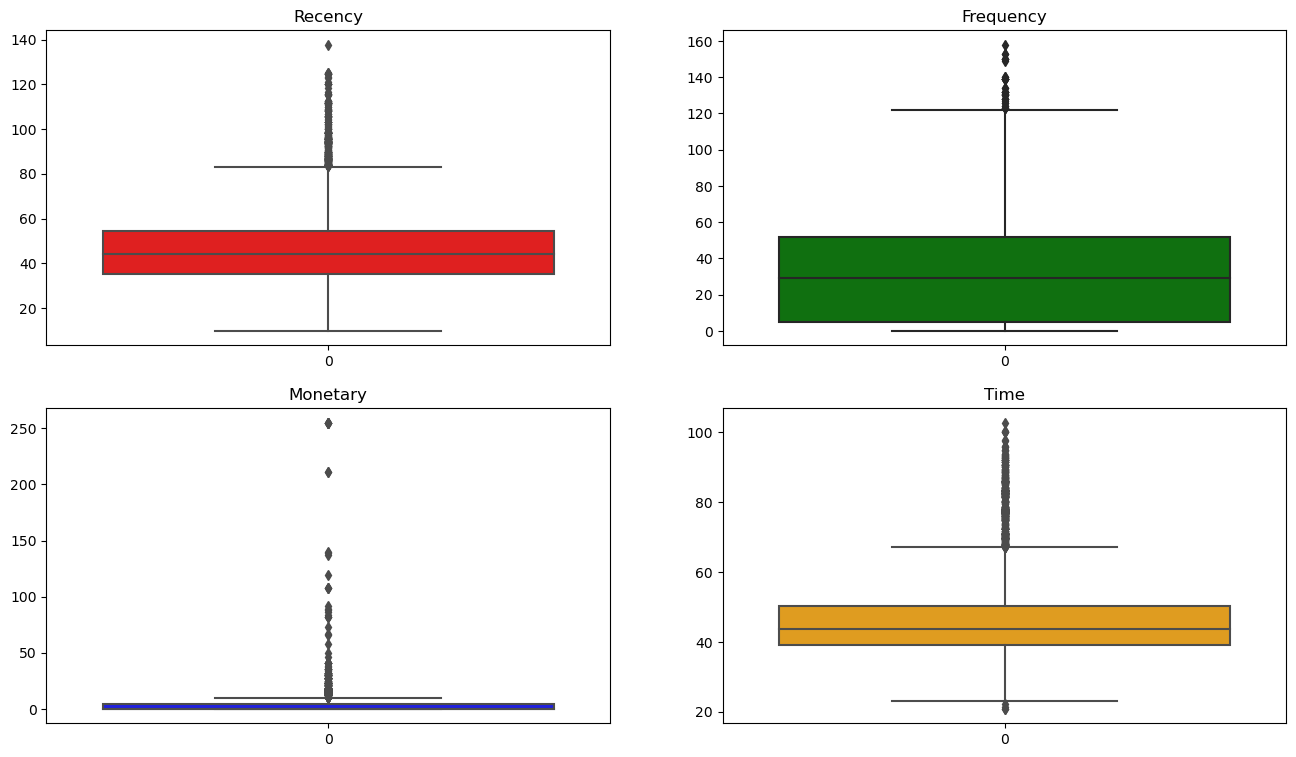


Recency:

  Statistic  Value
0      Mean    9.5
1    Median    7.0
2       Max   74.0
3       Min    0.0

Frequency:

  Statistic  Value
0      Mean    5.5
1    Median    4.0
2       Max   50.0
3       Min    1.0

Monetary:

  Statistic    Value
0      Mean   1378.6
1    Median   1000.0
2       Max  12500.0
3       Min    250.0

Time:

  Statistic  Value
0      Mean   34.2
1    Median   28.0
2       Max   98.0
3       Min    2.0


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

ss = StandardScaler()
nb = GaussianNB()
df = pd.read_csv('Brain_Disorders.csv')
x = df.iloc[:, 0:6]
y = df.iloc[:, 6]
x = ss.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 838)
model = nb.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

print('\nTesting Data:\n')
print('\nAccuracy Score = ', accuracy_score(y_test, y_pred))
print('\nPrecision Score = ', precision_score(y_test, y_pred, average='macro'))
print('\nRecall Score = ', recall_score(y_test, y_pred, average='macro'))
print('\nf1 Score = ', f1_score(y_test, y_pred, average='macro'))
print('\nConfusion Matrix:\n\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n\n', classification_report(y_test, y_pred))

print('\nTraining Data:\n')
print('\nAccuracy Score = ', accuracy_score(y_train, y_train_pred))
print('\nPrecision Score = ', precision_score(y_train, y_train_pred, average='macro'))
print('\nRecall Score = ', recall_score(y_train, y_train_pred, average='macro'))
print('\nf1 Score = ', f1_score(y_train, y_train_pred, average='macro'))
print('\nConfusion Matrix:\n\n', confusion_matrix(y_train, y_train_pred))
print('\nClassification Report:\n\n', classification_report(y_train, y_train_pred))

plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = 'magma')
plt.show()
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 9))
sns.boxplot(df.iloc[:, 0], color = 'red', ax = axes[0, 0])
sns.boxplot(df.iloc[:, 1], color = 'green', ax = axes[0, 1])
sns.boxplot(df.iloc[:, 2], color = 'blue', ax = axes[1, 0])
sns.boxplot(df.iloc[:, 3], color = 'orange', ax = axes[1, 1])
axes[0, 0].set_title('Recency')
axes[0, 1].set_title('Frequency')
axes[1, 0].set_title('Monetary')
axes[1, 1].set_title('Time')
plt.show()
print('\nRecency:\n')
stats_recency = {'Mean':9.5, 'Median':7.0, 'Max':74, 'Min':0}
stats_recency = [{'Statistic': key, 'Value': value} for key, value in stats_recency.items()]
stats_recency = pd.DataFrame(stats_recency)
print(stats_recency)
print('\nFrequency:\n')
stats_frequency = {'Mean':5.5, 'Median':4.0, 'Max':50, 'Min':1}
stats_frequency = [{'Statistic': key, 'Value': value} for key, value in stats_frequency.items()]
stats_frequency = pd.DataFrame(stats_frequency)
print(stats_frequency)
print('\nMonetary:\n')
stats_monetary = {'Mean':1378.6, 'Median':1000, 'Max':12500, 'Min':250}
stats_monetary = [{'Statistic': key, 'Value': value} for key, value in stats_monetary.items()]
stats_monetary = pd.DataFrame(stats_monetary)
print(stats_monetary)
print('\nTime:\n')
stats_time = {'Mean':34.2, 'Median':28, 'Max':98, 'Min':2}
stats_time = [{'Statistic': key, 'Value': value} for key, value in stats_time.items()]
stats_time = pd.DataFrame(stats_time)
print(stats_time)